# Позиция: джуниор дата сайнтист
# Компания: маркетинг

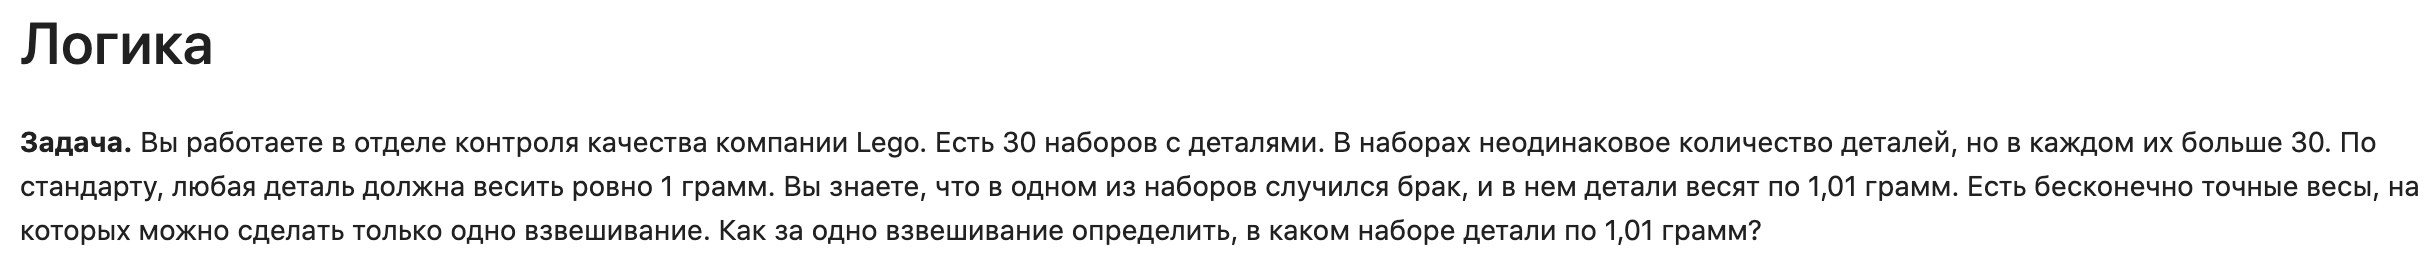

## **Решение.** 


Представим, что у нас есть только две коробки, в одной из них лежат более тяжелые детали. Если взять по одной детали из каждой коробки и взвесить их одновременно,то общий вес будет 2.01 г, но при этом мы не узнаем, какая из коробок дала дополнительные 0.01 г. Надо взвешивать как-то иначе.  

Если мы возьмем одну деталь из коробки №1 и две детали из коробки №2, то, что покажут весы? Результат зависит от веса деталей. Если коробка №1 содержит более тяжелые детали, то вес будет 3.01 г. Если с тяжелыми деталями коробка №2 — то 3.02 грамма. Подход найден.

Сделаем обощение: возьмем одну деталь из коробки №1, две детали из коробки №2, три детали из коробки №3 и т.д. Взвесьте этот набор деталей. Если все детали весят 1 г, то результат составит 465 г. «Излишек» внесет коробка с тяжелыми деталей.  

Таким образом, номер коробки можно узнать по простой формуле: (вес — 465) / 0.01. Если суммарный вес деталей составляет 465.15 г, то тяжелые детали находились в коробке №15.

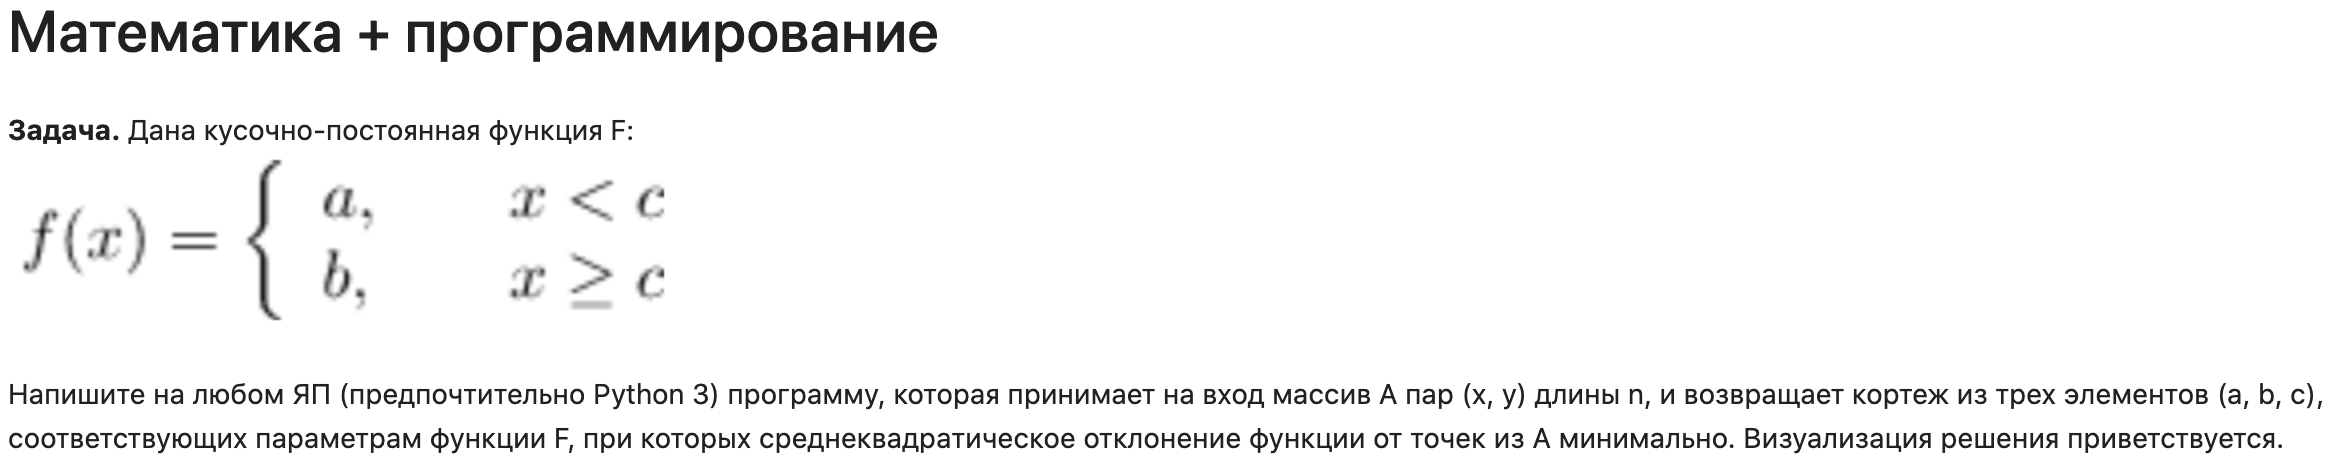

## **Решение 1.** 

In [200]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from random import randint

In [201]:
import os 
import random

DEFAULT_RANDOM_SEED = 71

def seedBasic(seed=DEFAULT_RANDOM_SEED):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

In [202]:
import warnings
warnings.filterwarnings("ignore")

In [203]:
def generate(n=5):
  x = np.array([randint(-10, 10) for p in range(0, n)]).astype('float')
  y = np.array([randint(-10, 10) for p in range(0, n)]).astype('float')
  print('A is', list(zip(x,y)))
  return x, y


def input_data(A):
  x = np.array([el[0] for el in A]).astype('float')
  y = np.array([el[1] for el in A]).astype('float')

  return x, y


def piecewise_constant(x, a, b, c):
    y = np.piecewise(x, [x < c, x >= c],
                     [lambda x: a, lambda x: b])
    return y

def make_plot(x, y, n_x, n_y):
  fig, ax = plt.subplots(figsize=(8, 5))

  ax.plot(x, y, 'o', ls='')
  ax.plot(n_x, n_y)

  ax.set_xlim(x.min()-5, x.max()+5)
  ax.set_ylim(y.min()-5, y.max()+5)

  ax.set_ylabel('Y')  
  ax.set_xlabel('X')
  ax.set_title('Approximation')

  ax.grid()

def approximation(A=None, vizualization=True):
  if A == None:
    x, y = generate()
  else:
    x, y = input_data(A)
  popt_piecewise, pcov = curve_fit(piecewise_constant, x, y)
  if vizualization:
    n_x = np.linspace(x.min(), x.max(), 50)
    n_y = piecewise_constant(n_x, *popt_piecewise)
    make_plot(x, y, n_x, n_y)

  return tuple(popt_piecewise)

A is [(-6.0, -2.0), (-7.0, -4.0), (-6.0, -2.0), (-1.0, -10.0), (1.0, 10.0)]
a, b, c = (-4.500000000011997, 10.00000000001963, 1.0)


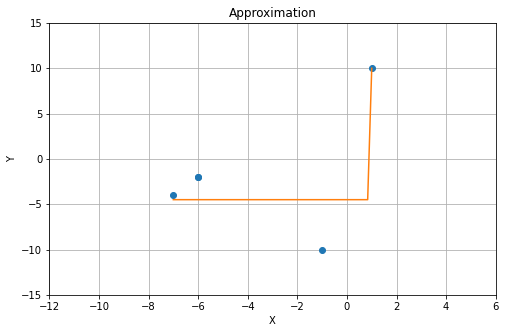

In [204]:
# variant 1 
c = approximation()
print(f'a, b, c = {c}')

a, b, c = (-4.000000000010906, 3.3333333333384223, 1.0)


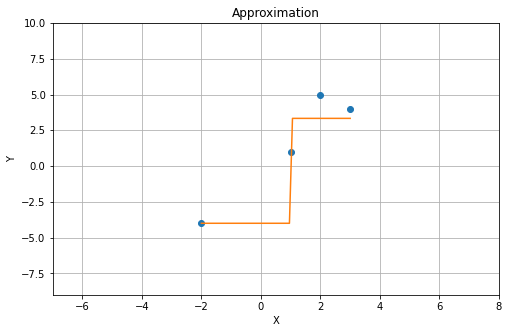

In [205]:
# variant 2
A = [(1,1), (2,5), (3,4), (-2, -4)]
c = approximation(A)
print(f'a, b, c = {c}')

## **Решение 2.**

In [206]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
import re

In [207]:
def make_tree(A=None, vizualization=True):
  if A == None:
    x, y = generate()
  else:
    x, y = input_data(A)
  X, y = x.reshape(-1, 1), y.reshape(-1, 1)
  tree_reg = DecisionTreeRegressor(max_depth=1, criterion="squared_error")
  tree_reg.fit(X, y)
  # print(tree_reg.get_params())
  tree_rules = export_text(tree_reg)
  # print(tree_rules)
  numbers = re.findall(r"[-+]?(?:\d*\.\d+|\d+)", tree_rules)
  output = tuple([numbers[2], numbers[-1], numbers[1]])
  if vizualization:
    Xs = np.linspace(x.min(), x.max(), 50).reshape(-1, 1)
    Ys = tree_reg.predict(Xs)
    n_x, n_y = Xs.flatten(), Ys.flatten()
    make_plot(x, y, n_x, n_y)

  return output

A is [(7.0, -9.0), (-3.0, 3.0), (-4.0, 3.0), (8.0, 7.0), (10.0, 8.0)]
a, b, c = ('-1.00', '7.50', '7.50')


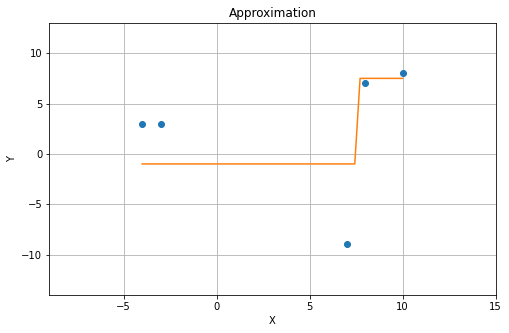

In [208]:
# variant 1 
c = make_tree()
print(f'a, b, c = {c}')

a, b, c = ('-4.00', '3.33', '-0.50')


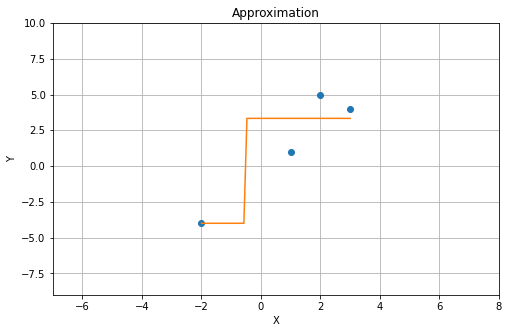

In [209]:
# variant 2
A = [(1,1), (2,5), (3,4), (-2, -4)]
c = make_tree(A)
print(f'a, b, c = {c}')

## **Решение 3.**

A is [(2.0, 7.0), (-8.0, 8.0), (0.0, 7.0), (-2.0, -1.0), (-2.0, -4.0)]
a, b, c = (8.0, 2.25, -2.0)


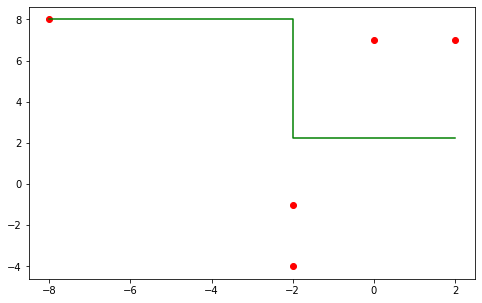

In [210]:
n = 5

x, y = generate(5)

idx = np.argsort(x)
x = x[idx]
y = y[idx]
 
a = []
b = []
c = []
r = []

for i in range(1, n):
    c.append(x[i])
    a.append(np.mean(y[:i]))
    b.append(np.mean(y[i:]))
    r.append(np.std(y[:i])+np.std(y[i:]))

idx=np.argmin(r)
res = tuple([a[idx], b[idx], c[idx]])
print(f'a, b, c = {res}')
plt.plot(x, y, 'ro')
stepx = np.array([x[0], c[idx], c[idx], x[-1]])
stepy = np.array([a[idx], a[idx], b[idx], b[idx]])
plt.plot(stepx, stepy, 'g-');

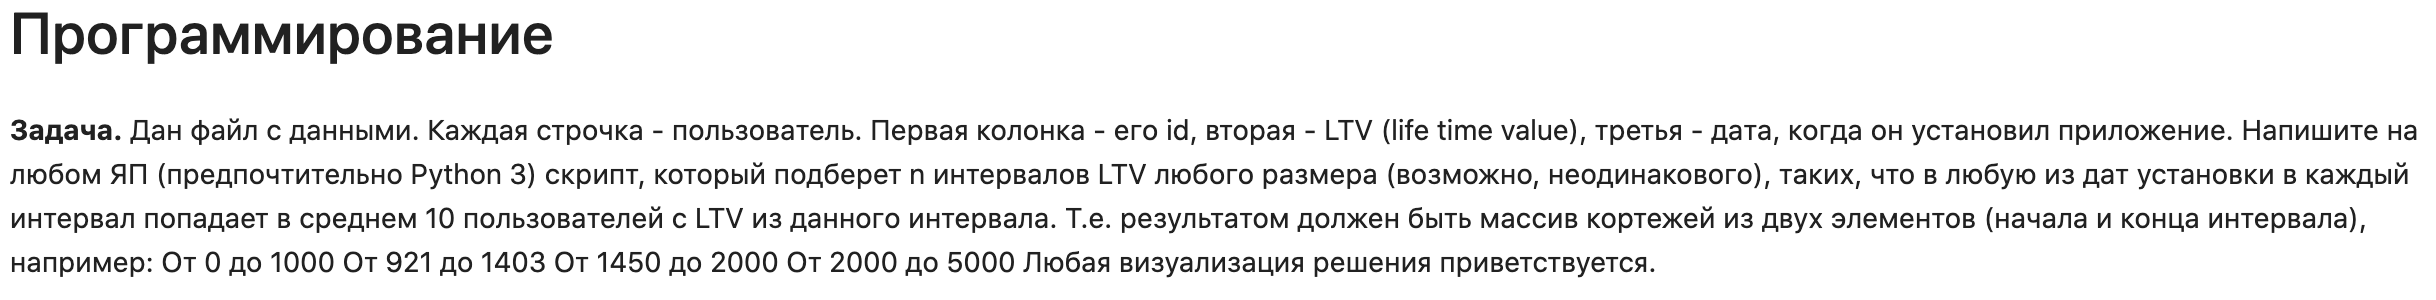

## **Решение 1.**

In [211]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [212]:
cd /content/drive/MyDrive/Тестовое/

/content/drive/MyDrive/Тестовое


In [213]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [214]:
import pandas as pd

In [215]:
df = pd.read_csv('task.csv')

In [216]:
df.columns = ['id', 'ltv', 'install_date']

In [217]:
df.ltv.describe()

count    182506.000000
mean        427.396403
std         944.535640
min           0.000000
25%           0.000000
50%           0.000000
75%         648.000000
max       73899.000000
Name: ltv, dtype: float64

Заметим, что самое распространённое значение -- 0. Посмотрим на распределение без нуля.

In [218]:
np.exp(np.log(df[df.ltv != 0.0].ltv))

0          999.00
3         1996.00
7         1269.00
8         1172.00
10         899.00
           ...   
182465    1848.00
182468    2526.00
182471    3349.00
182484    1366.00
182492     524.55
Name: ltv, Length: 54089, dtype: float64

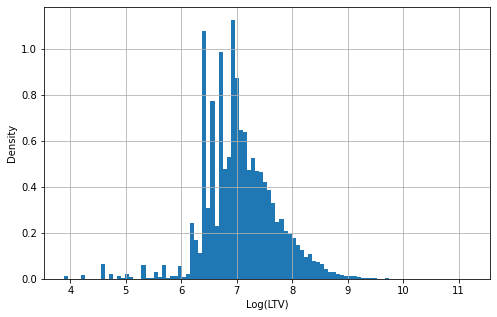

In [219]:
plt.hist(np.log(df[df.ltv != 0.0].ltv), bins=100, density=True)    
plt.ylabel('Density')
plt.xlabel('Log(LTV)')
plt.grid();

Похоже на лог-нормальное распределение.

In [220]:
from scipy import stats

In [221]:
from scipy.stats import lognorm

In [222]:
shape, loc, scale = lognorm.fit(df[df.ltv != 0.0].ltv, floc=0)

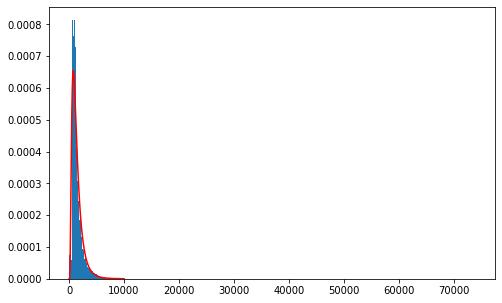

In [223]:
x = np.logspace(0, 4, 200)
pdf = lognorm.pdf(x, shape, loc, scale)
plt.hist(df[df.ltv != 0.0].ltv, bins=500, density=True)    
plt.plot(x, pdf, 'r')

plt.show()

In [224]:
# выбросим ноль, по условию не подходит нам, только усложняет вычисление
unique_v = sorted(df.ltv.unique().tolist())[1:]
print('len', len(unique_v))
print('max', max(unique_v))
print('min', min(unique_v))

len 8346
max 73899.0
min 49.0


In [225]:
max_v = max(unique_v)
min_v = min(unique_v)

Попробуем сделать сетку соответсвующую лог-нормальному распределнию и по ней искать интервалы.

In [226]:
grid = np.sort(np.logspace(0, 5, 5000))

In [227]:
grid = [el for el in grid if el > min_v and el < max_v]

In [228]:
len(grid)

3178

In [229]:
t = df.groupby(by=['install_date']).agg({'ltv': 'value_counts'}).rename(columns={'ltv':'counts'}).reset_index()

In [230]:
n_days = t.install_date.nunique()

**"в среднем 10 пользователей с LTV"** очень расплывчата форумлировка. Будем искать в диапазоне значение от 5 до 15. А в качестве среднего будем использовать как моду, так медиану с ср.арифметическим.

In [231]:
def find_interval(grid_l):

  intervals = []
  for i in range(len(grid_l)-1):
    for j in range(i+1, len(grid_l)):
      tmp = t[(t.ltv > grid_l[i]) & (t.ltv <= grid_l[j])]
      if tmp.install_date.nunique() != n_days:
        break
      ids = np.array(tmp.groupby('install_date').agg({'counts': sum})['counts'])
      m = [stats.mode(ids).mode[0], np.mean(ids), np.median(ids)]
      if [el for el in m if el in range(5, 16)] == []:
        break
      else:
        print(f'\nmode={m[0]}, mean={m[1]}, median={m[2]}\n')
        left, right = round(grid[i], 0), round(grid[j], 0)
        intervals.append(tuple([left, right]))
        break
    
  return intervals

In [232]:
%%time

intervals_grid = find_interval(grid)
print(intervals_grid)


mode=7, mean=16.62, median=13.0


mode=14, mean=21.113333333333333, median=19.0

[(797.0, 799.0), (997.0, 999.0)]
CPU times: user 2.77 s, sys: 9.95 ms, total: 2.78 s
Wall time: 2.79 s


Проверка

In [233]:
check = t[(t.ltv > 797) & (t.ltv <= 799)]

In [234]:
check

,install_date,ltv,counts
3,2021-02-01,799.0,19
64,2021-02-01,798.0,1
189,2021-02-02,799.0,20
211,2021-02-02,798.0,2
364,2021-02-03,799.0,25
...,...,...,...
30945,2021-06-27,799.0,2
31055,2021-06-28,799.0,8
31189,2021-06-29,799.0,6
31223,2021-06-29,798.0,1


In [235]:
check.install_date.nunique()

150

In [236]:
check_ids = np.array(check.groupby('install_date').agg({'counts': sum})['counts'])

In [237]:
stats.mode(check_ids).mode[0]

7

In [238]:
np.mean(check_ids)

16.62

In [239]:
np.median(check_ids)

13.0

## **Решение 2.**

Проверим, как будет работать просто со всеми значениями.

In [240]:
len(unique_v)

8346

In [241]:
%%time

intervals_values = find_interval(unique_v)
print(intervals_values)


mode=6, mean=14.666666666666666, median=11.5


mode=12, mean=18.013333333333332, median=15.5

[(874.0, 876.0), (3363.0, 3371.0)]
CPU times: user 7.3 s, sys: 25.5 ms, total: 7.32 s
Wall time: 7.3 s
